### 1. 신경망과 퍼셉트론

인공신경망은 사람의 뇌를 모방하여 인공지능을 구현하려는 컴퓨터 프로그램이다.
사람의 뇌는 뉴런(neuron)으로 이루어져 있고, 이는 입력(Dendrite), 계산(Soma), 출력(Axon) 기능을 가진 정보처리기관으로 볼 수 있다. 이전 neuron의 axon과 현재 neuron의 dendrite 부분이 만나는 곳에 작은 간극인 synapse가 존재하고, 세포체 soma에서는 들어온 정보가 역치 이상이면 발화한다. 이렇게 발화한 neuron은 axon을 통해 다음 neuron에게 정보를 전달한다. 

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230410104038/Artificial-Neural-Networks.webp" height="250px" width="500px">

퍼셉트론(Perceptron)은 미국의 심리학자인 Frank Rosenblatt이 1958년에 구현한 인공신경망으로, 여러개의 인공신경세포(artificial neuron)로 구성되어 있다. 인공신경세포는 신경세포의 정보처리 방식과 작동 원리가 유사하다. $x$는 입력값을 의미하며, $w$는 가중치(Weight), $y$는 출력값이다. 각각의 뉴런으로부터 오는 정보 $x_1, x_2, ..., x_n$와 시냅스 역할을 하는 가중치 $w_1, w_2,..., w_n$이 곱해져서 인공 뉴런에 보내지고, 이때 활성화 함수(activation function)를 덧붙여서 역치에 따라 발화 여부를 결정한다. 각 입력값과 그에 해당되는 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는 인공 뉴런은 출력 신호로서 1을 출력하고, 그렇지 않을 경우에는 0을 출력한다. 이러한 함수를 계단 함수(Step function)라고 한다.

신경망의 학습은 연결가중치 weight 값을 변화시키는 것을 의미한다. 실제값($y$)과 예측값($y'$)의 차이(오차)를 최소화 하도록 퍼셉트론의 연결강도를 조절하는 것을 학습(learning)이라고 한다.

### 2. 다층 퍼셉트론(MLP)와 모델 실습

##### 다층 신경망(Multi-Layer Perceptron)

퍼셉트론은 2차원 평면을 분할하는 1차원 함수의 기울기와 절편을 점진적으로 찾아가는 인공신경망 모델로도 볼 수 있다. 따라서 퍼셉트론은 선형분리가 불가능한 데이터셋을 학습할 수 없다는 한계가 있다. 대표적으로 XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을 때에만 출력값이 1이 되고, 입력값 두개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트다. 단층 퍼셉트론으로는 XOR 게이트를 구현하는 것이 불가능하지만, 층을 더 쌓으면 이를 구현할 수 있다.

<img src="https://raw.githubusercontent.com/qingkaikong/blog/master/40_ANN_part3_step_by_step_MLP/figures/figure1_Perceptron_limitation.jpg" height="250px" width="500px">

<img src="https://wikidocs.net/images/page/24958/xorgraphandxorgate.PNG" height="250px" width="450px">

따라서 이러한 한계를 극복하기 위해 나온 다층 신경망(Multi-Layer Perceptron)은 입력층과 출력층 사이에 한개 이상의 은닉층(hidden layer)을 추가했다. 기존 단층 퍼셉트론인 AND, NAND, OR 게이트를 조합하여 XOR 게이트를 구현한 게 다층 퍼셉트론의 예다. 또한, 은닉층이 많아질수록 더 복잡한 형태의 데이터를 다룰 수 있고, 은닉층이 2개 이상인 신경망을 심층 신경망(Deep Neural Network)이라고 한다. 다층 신경망의 활성화 함수 또한 단층 퍼셉트론의 계단함수에서 조금 더 복잡한 시그모이드나 tanh 함수를 이용하고, 오차를 줄이기 위해 경사하강법(gradient descendent), 역전파(backpropagation) 등이 등장했다.

<img src="https://wikidocs.net/images/page/24958/perceptron_4image.jpg" height="250px" width="300px">

<img src="https://www.researchgate.net/publication/354817375/figure/fig2/AS:1071622807097344@1632506195651/Multi-layer-perceptron-MLP-NN-basic-Architecture.jpg" height="250px" width="500px">

##### 시그모이드 함수(Sigmoid Function)
다층 신경망의 학습 중 역전파(backpropagation) 알고리즘은 경사하강법(gradient desendent)을 사용하는데, 이때 활성화 함수가 미분가능해야 한다. 시그모이드 함수는 미분가능하고, 계단함수와 달리 내부값의 차이를 표현할 수 있다. 즉, 시그모이드는 신경망의 내부값에 따라 0과 1 사이의 값을 출력하기 때문에 계단 함수에 비해 다양한 오차를 계산할 수 있다. 또한, 0과 1 사이의 확률로 나타내기 때문에 입력값의 의미를 더 잘 표현할 수 있게 된다.

그러나 주황색 부분과 같이 기울기가 0에 가까워지면, 역전파 과정에서 학습효과가 떨어지는 기울기 소실(vanishing gradient) 문제가 발생한다. 신경망의 층이 깊어지면 앞단에서는 거의 기울기를 전파받을 수 없게 되고, 매개변수 $w$가 업데이트 되지 않아 학습이 되지 않는다. 또한, 중심점이 0이 아니고 항상 양수의 값을 출력하기 때문에 연결가중치의 학습과정이 지그재그 패턴으로 나타나 비효율적이다.

<img src="https://wikidocs.net/images/page/60683/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C%ED%95%A8%EC%88%981.PNG" height="250px" width="370px">
<img src="https://wikidocs.net/images/page/60683/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C%ED%95%A8%EC%88%982.PNG" height="250px" width="370px">
<img src="https://www.ejable.com/wp-content/uploads/2022/04/vanishing-gradient-problem.webp" height="250px" width="350px">


##### 하이퍼볼릭탄젠트 함수(Hyperbolic Tangent Function)
tanh 함수는 시그모이드 함수의 장점을 그대로 가져오면서 입력값을 -1과 1 사이의 값으로 변환하기 때문에 non zero 문제를 해결할 수 있다. 시그모이드 함수와 비교하여 출력값의 변화폭이 더 크기 때문에 기울기 소실 증상이 적어 시그모이드 함수보다는 많이 사용되지만, 여전히 killing gradient 이슈를 해결할 수는 없다.

<img src="https://storage.googleapis.com/skytowner_public/images/EocgEfUyUROUmozW2PGJ/image_1627544541256.png" height="250px" width="370px">

##### 렐루 함수(ReLU Function)
인공신경망에서 가장 인기가 많은 함수로, $f(x)=max(0, x)$의 간단한 수식을 가지고 있다. 양수에서 함수의 기울기가 1로 고정이 되어 있어서 기울기 소실 문제가 발생하지 않는다. 이는 신경망의 깊은 층까지 역전파를 통한 학습을 가능케 한다. 그러나 입력값이 음수일 경우 기울기가 0이 되어서 시경망 학습이 진행되지 않는 dying ReLu 문제가 있다. 이를 극복하기 위해 리키 렐루(Leaky ReLU)는 음수 입력값에 매우 작은 기울기를 줘서 음수일 경우에도 학습이 가능하게 했다. 또다른 변형인 PReLU는 음수 기울기를 $a$라는 변수를 줘서 학습모델에 따라 유동적으로 학습 효율을 높일 수 있게 했다. ELU는 음수 입력값 부분을 곡선이 들어간 exponential 함수를 사용하여 보다 빠르고 정확한 학습을 가능하게 한다.

<img src="https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png" height="250px" width="370px"><br>
<img src="https://www.jmis.org/journal/jmis/jmis-9-1/gif/jmis-9-1-21-g4.gif" height="800px" width="370px">

##### XOR Practice
- step 1: feedforward
- step 2: MSE 계산
- step 3: backpropagation

<img src="https://blog.kakaocdn.net/dn/boE4hd/btrkekMQ95U/eMSv1re1trFNlD91fkaSz0/img.png" height="270px" width="500px">

In [1]:
import numpy as np

class MLP:
  def __init__(self, input_size, hidden_size, output_size):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    # 가중치 초기화
    self.w1_w2 = np.random.random((self.input_size, self.hidden_size)) # (2, 2)
    self.w3 = np.random.random((self.hidden_size, self.output_size)) # (2, 1)

  def sigmoid(self, X):
    return 1 / (1 + np.exp(-X))

  def feed_forward(self, X):
    self.z1_z2 = np.dot(X, self.w1_w2)
    self.h = self.sigmoid(self.z1_z2)
    self.z3 = np.dot(self.h, self.w3)
    self.o = self.sigmoid(self.z3)
    return self.o

  def mse_loss(self, y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

  def back_propagation(self, X, y, y_pred, learning_rate):
    dc_do1 = -2 * (y-y_pred)
    do1_dz3 = y_pred * (1-y_pred)
    dz3_dw3 = self.h
    dc_dw3 = dc_do1 * do1_dz3 * dz3_dw3
    self.w3 = self.w3 + learning_rate * -dc_dw3.T
    dc_dw1_w2 = dc_do1 * do1_dz3 * np.dot(self.w3 * (self.h * (1-self.h)).T, X)
    
    self.w1_w2 = self.w1_w2 + learning_rate * -dc_dw1_w2.T
  
  def train(self, X_train, y_train, epochs, learning_rate):
    for epoch in range(epochs):
      for i in range(len(X_train)):
        y_pred = self.feed_forward([X_train[i]])
        loss = self.mse_loss([y_train[i]], y_pred)
        self.back_propagation([X_train[i]], [y_train[i]], y_pred, learning_rate)
      if np.mod(epoch, 100) == 0:
        print('epoch=', epoch, 'loss=', loss)

X_train = np.random.randint(0, 2, (100,2))
y_train = (X_train[:, 0] != X_train[:, 1]).astype(int)

print(X_train[1])
print(y_train[1])

[0 1]
1


In [2]:
mlp = MLP(input_size=2, hidden_size=2, output_size=1)
mlp.train(X_train, y_train, epochs=1000, learning_rate=0.1)

epoch= 0 loss= 0.23773117223155296
epoch= 100 loss= 0.12259460701082711
epoch= 200 loss= 0.06840692054466402
epoch= 300 loss= 0.04249400240738107
epoch= 400 loss= 0.029940248776123217
epoch= 500 loss= 0.022813630958926596
epoch= 600 loss= 0.01830118051611981
epoch= 700 loss= 0.015217033227965051
epoch= 800 loss= 0.01298833216362914
epoch= 900 loss= 0.011308538129464321


In [4]:
# 테스트 값으로 모델값 예측
test_input = np.array([[0, 0]])
predicted_output = mlp.feed_forward(test_input)
print("Predicted Output:", test_input, predicted_output)
test_input = np.array([[1, 0]])
predicted_output = mlp.feed_forward(test_input)
print("Predicted Output:", test_input, predicted_output)
test_input = np.array([[0, 1]])
predicted_output = mlp.feed_forward(test_input)
print("Predicted Output:", test_input, predicted_output)
test_input = np.array([[1, 1]])
predicted_output = mlp.feed_forward(test_input)
print("Predicted Output:", test_input, predicted_output)

Predicted Output: [[0 0]] [[0.05454398]]
Predicted Output: [[1 0]] [[0.90521551]]
Predicted Output: [[0 1]] [[0.88902697]]
Predicted Output: [[1 1]] [[0.13449339]]


##### MNIST Classification Practice

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [36]:
X = digits['images']
y = digits['target']
target_names = digits['target_names']
target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

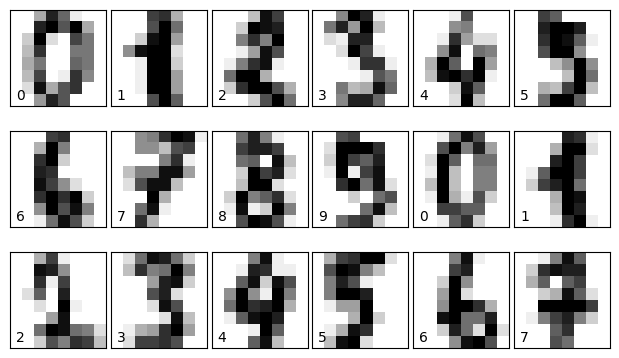

In [39]:
# Display sample data
fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(18):
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y[i]))

In [40]:
print(X.shape)
print(y.shape)

(1797, 8, 8)
(1797,)


In [41]:
# 8x8 -> 64 픽셀값을 가진 배열로 변환
n_samples = len(X)
X = X.reshape((n_samples, -1))
print(X.shape)

(1797, 64)


In [42]:
X_tn, X_te, y_tn, y_te = train_test_split(X, y, test_size=0.2, random_state=14)
print(X_tn.shape)
print(X_te.shape)

(1437, 64)
(360, 64)


In [44]:
clf_mlp = MLPClassifier()
clf_mlp.fit(X_tn, y_tn)

print(f'Train Accuracy = {clf_mlp.score(X_tn, y_tn)}')
print(f'Test Accuracy = {clf_mlp.score(X_te, y_te)}')

Train Accuracy = 1.0
Test Accuracy = 0.9833333333333333


In [45]:
print("Total Iteration done : ", clf_mlp.n_iter_)
print("Number of layer : ", clf_mlp.n_layers_)
print("Number of output : ", clf_mlp.n_outputs_)

Total Iteration done :  149
Number of layer :  3
Number of output :  10
